In [ ]:
import detect_peaks
from importlib import reload
reload(detect_peaks )
from detect_peaks import *

import numpy as np
from qcodes import load_data, MatPlot
plt.rcParams['image.cmap'] = 'hot'
%matplotlib notebook

## Load data

In [ ]:
data_idx = (0,2)
swap_axes = True  # Swap X and y axes


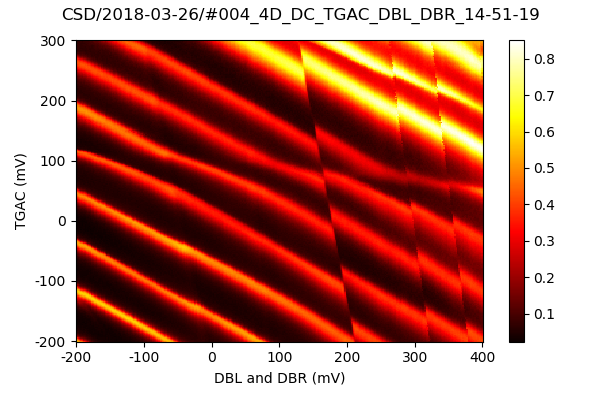

In [ ]:
data = load_data('CSD/2018-03-26/#004_4D_DC_TGAC_DBL_DBR_14-51-19')

x = data.DC_control_TGAC_set[1,1,1,:]
y = data.DBL_DBR_set[1,1,:]
Z = data.DC_voltage[data_idx]  #change these values for different datasets
if swap_axes:
    Z = np.swapaxes(Z,0,1)
    x, y = y, x

MatPlot(Z, x=x, y=y)

## Find transitions


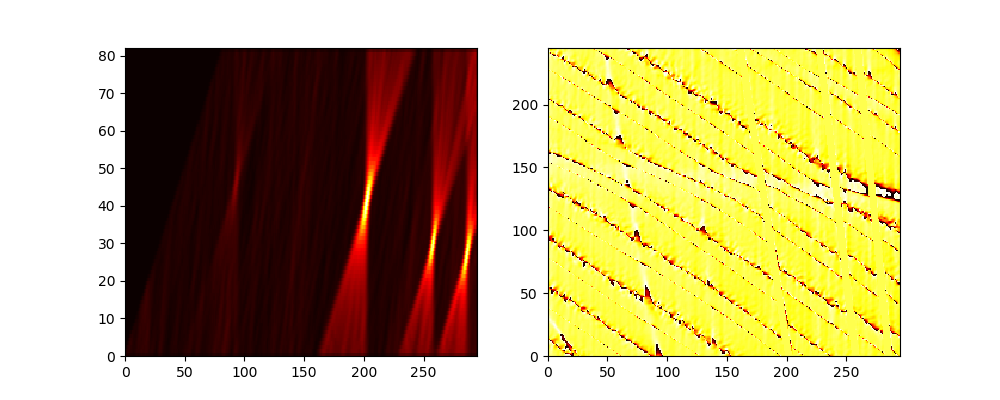


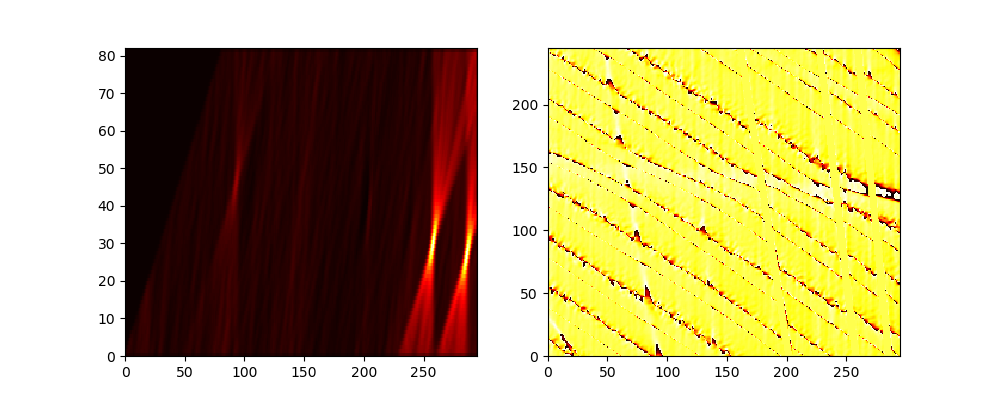


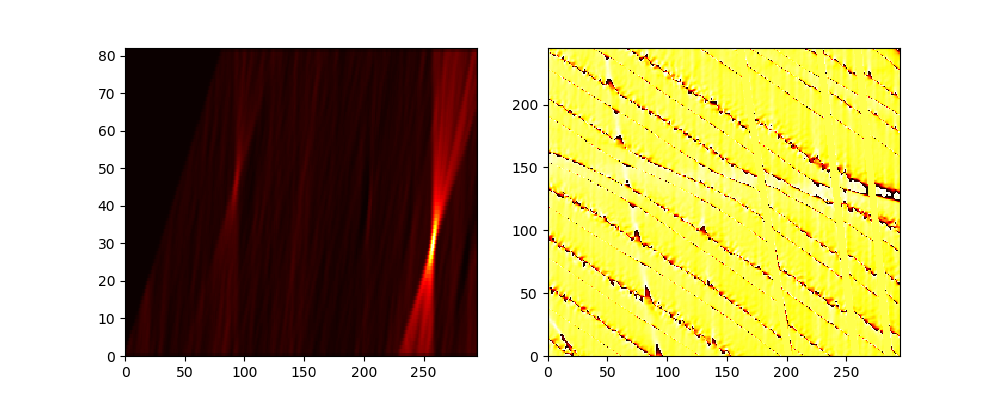


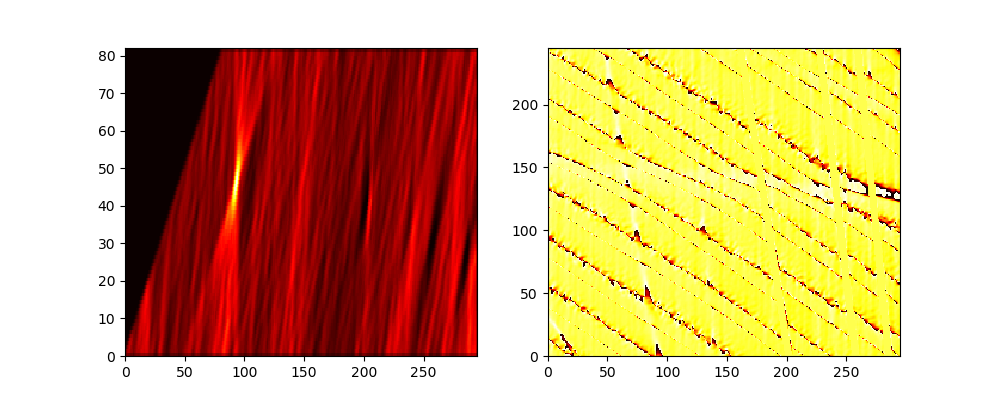

[{'gradient': -6.125,
  'gradient_error': 2.50156347717323,
  'intensity': 0.8385487528344672,
  'location': 0.21},
 {'gradient': -9.423076923076923,
  'gradient_error': 3.8518518518518565,
  'intensity': 0.7723356009070295,
  'location': 0.378},
 {'gradient': -8.166666666666666,
  'gradient_error': 3.3370411568409364,
  'intensity': 0.760997732426304,
  'location': 0.322}]

In [ ]:
transitions = find_transitions(Z,x,y, 
                               true_units=True, 
                               charge_transfer=False, 
                               plot=True)
transitions


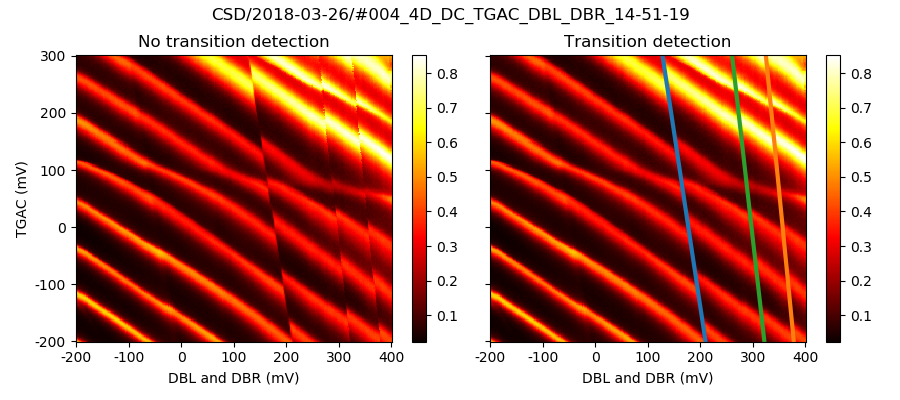

In [ ]:
plot = MatPlot(Z, Z, x=x, y=y, sharey=True)
plot_transitions(transitions, plot[1], linewidth=3)
plot[1].set_ylabel('')
plot[0].set_title('No transition detection')
plot[1].set_title('Transition detection')
plot.tight_layout()